In [ ]:
import cv2
import numpy as np
import types
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Converts messages or data into binary format (Binary)
def messageToBinary(message):
    if type(message) == str: # string
        return ''.join([format(ord(i), "08b") for i in message])
    elif type(message) == bytes or type(message) == np.ndarray: #array
        return [format(i, "08b") for i in message]
    elif type(message) == int or type(message) == np.uint8: #int
        return format(message, "08b")
    else:
        raise TypeError("Input type not supported")

In [ ]:
# Function to hide the secret message into the image
def hideData(image, secret_message):

    # Calculate the maximum bytes to encode
    n_bytes = image.shape[0] * image.shape[1] * 3 // 8 # bits into bytes
    print("Maximum bytes to encode:", n_bytes)

    # Check if the number of bytes to encode is less than the maximum bytes in the image
    if len(secret_message) > n_bytes:
        raise ValueError("Error encountered: insufficient bytes, need a bigger image or less data!")

    secret_message += "######"  # You can use any string as the delimiter

    data_index = 0
    # Convert input data to binary format using messageToBinary() function
    binary_secret_msg = messageToBinary(secret_message)

    data_len = len(binary_secret_msg)  # Find the length of data that needs to be hidden

    for values in image:
        for pixel in values:
            # Convert RGB values to binary format
            r, g, b = messageToBinary(pixel)

            # Modify the least significant bit only if there is still data to store
            if data_index < data_len:
                pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)  # Red channel
                data_index += 1
            if data_index < data_len:
                pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)  # Green channel
                data_index += 1
            if data_index < data_len:
                pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)  # Blue channel
                data_index += 1

            # If all data is encoded, break out of the loop
            if data_index >= data_len:
                break


    return image

In [ ]:
  def showData(image):

    binary_data = ""
    for values in image:
        for pixel in values:
            r, g, b = messageToBinary(pixel) # convert the red, green and blue values into binary format
            binary_data += r[-1] # extracting data from the least significant bit of red pixel
            binary_data += g[-1] # extracting data from the least significant bit of green pixel
            binary_data += b[-1] # extracting data from the least significant bit of blue pixel

    # split by 8-bits
    all_bytes = [ binary_data[i:i+8] for i in range(0, len(binary_data), 8) ]
    # convert from bits to characters
    decoded_data = ""
    for byte in all_bytes:
        decoded_data += chr(int(byte, 2))
        if decoded_data[-5:] == "#####": # check if we have reached the delimiter which is "#####"
            break
     #print(decoded_data)
    return decoded_data[:-5] # remove the delimiter to show the original hidden message


In [ ]:
def decode_text():
    # Read the hidden image
    image_name = input ("Enter hidden image name (with extension):")
    image = cv2.imread(image_name)  # Read the image using OpenCV
    print ("Hidden image as shown below:")
    resized_image = cv2.resize(image, (500, 500))  # Resize the image as needed
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))  # View photo using cv2.imshow
    text = showData(image)
    return text

In [ ]:
def encode_text():
    image_name = input("Enter image name (with extension): ")
    image = cv2.imread(image_name)  # Read the input image using OpenCV-Python.

    # Check if the image was loaded successfully
    if image is None:
        raise FileNotFoundError(f"Image file '{image_name}' not found or could not be read.")

    # Details of the image
    print("The shape of the image is: ", image.shape)  # Check the shape of image to calculate the number of bytes in it
    print("The original image is as shown below: ")

    resized_image = cv2.resize(image, (500, 500))  # Resize the image as per your requirement
    plt.imshow(cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB))  # Display the image with a window name

    data = input("Enter data to be encoded: ")
    if len(data) == 0:
        raise ValueError("Data is empty")

    filename = input("Enter the name of new encoded image (with extension): ")
    encoded_image = hideData(image, data)  # Call the hideData function to hide the secret message into the selected image
    cv2.imwrite(filename, encoded_image)

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 1

Encoding...
Enter image name (with extension): /content/beach.jpg
The shape of the image is:  (727, 728, 3)
The original image is as shown below: 
Enter data to be encoded: Hello World
Enter the name of new encoded image (with extension): secret.png
Maximum bytes to encode: 198471


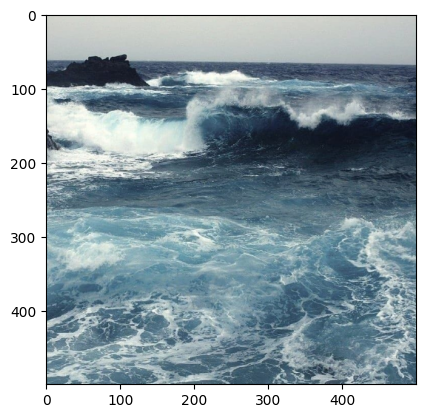

In [ ]:
# Image Steganography
def Steganography():
    a = input("Image Steganography \n 1. Encode the data \n 2. Decode the data \n Your input is: ")
    userinput = int(a)
    if (userinput == 1):
        print("\nEncoding...")
        encode_text()
    elif (userinput == 2):
        print("\nDecoding...")
        print("Decoded message is " + decode_text())
    else:
        raise Exception("Enter correct input")

Steganography()  # Start the process